In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from quantfin.random_walk import geometric_brownian
from quantfin.volatility import moving_average, ewma

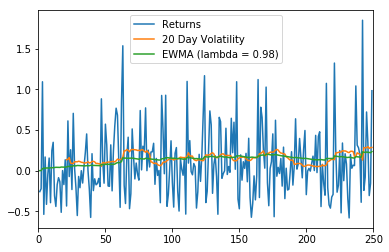

In [4]:
t = np.arange(0, 250) # Time
A = geometric_brownian(250, 0.01, 0.0, 0.4) # Closing prices

R = np.array([(A[n] - A[n-1]) / A[n-1] for n in range(1, 250)]) # Returns
t = t[1:]

returns, = plt.plot(t, R);
plt.xlim((0, 250));

M = 20
sigma = moving_average(R, M)
    
volatilty, = plt.plot(t[M:], sigma);

smoothing = 0.98
sigma2 = ewma(R, smoothing)

ewma_plot, = plt.plot(t, sigma2);

plt.legend([returns, volatilty, ewma_plot],
           ["Returns",
            "20 Day Volatility",
            "EWMA (lambda = {})".format(smoothing)]);